In [22]:
#importing the neccesory libraries->
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#laoding the dataset
df=pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/StockTurnoverRatioDatasetAnalysis#381/DDEM01USA156NWDB.csv")

In [24]:
# Display the first few rows of the dataset
print(df.head())

         DATE  DDEM01USA156NWDB
0  1975-01-01          19.50568
1  1976-01-01          19.62643
2  1977-01-01          19.88329
3  1978-01-01          26.20119
4  1979-01-01          27.36045


In [25]:
#handling missing values
df.fillna(method='ffill', inplace=True)

In [26]:
# Convert the DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [27]:
# Set the DATE column as the index
df.set_index('DATE', inplace=True)

In [28]:
# Display the data types to ensure DATE is in datetime format
print(df.dtypes)

DDEM01USA156NWDB    float64
dtype: object


In [29]:
# Calculate and display descriptive statistics
print(df['DDEM01USA156NWDB'].describe())


count     45.000000
mean     109.784262
std       76.538744
min       19.505680
25%       63.836320
50%       86.029930
75%      151.711100
max      407.630400
Name: DDEM01USA156NWDB, dtype: float64


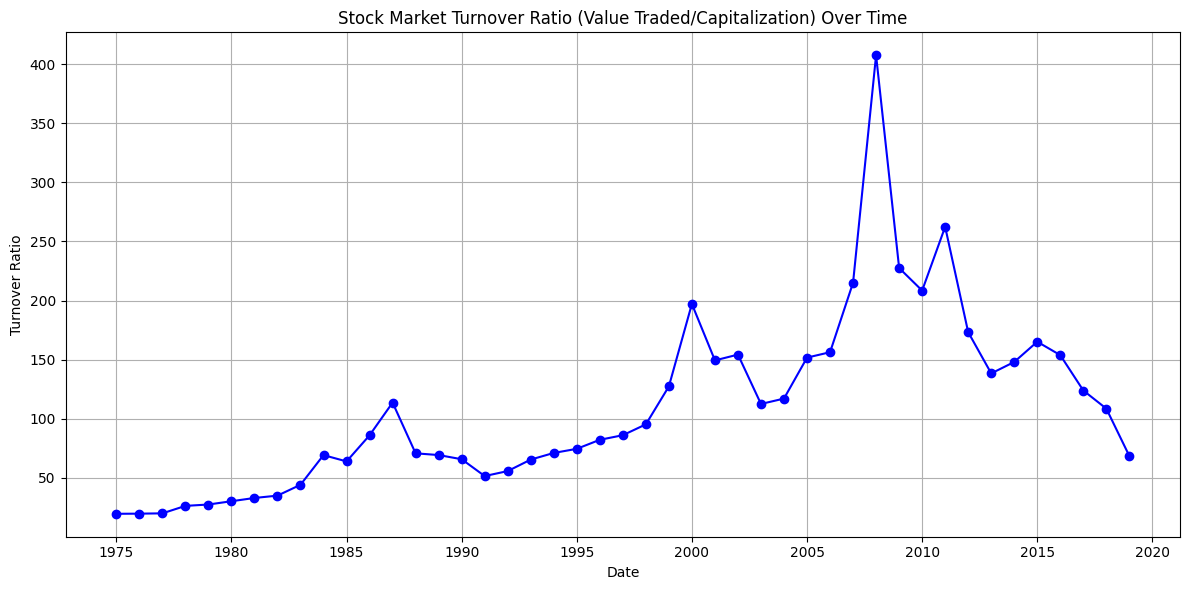

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DDEM01USA156NWDB'], marker='o', linestyle='-', color='b')  # Use df.index to access the dates
plt.title('Stock Market Turnover Ratio (Value Traded/Capitalization) Over Time')
plt.xlabel('Date')
plt.ylabel('Turnover Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

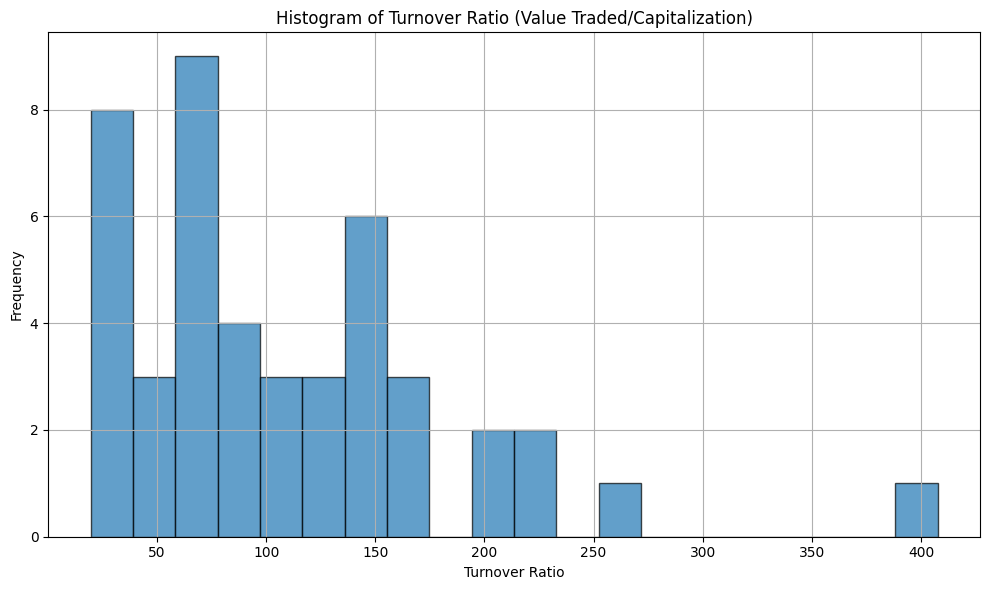

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['DDEM01USA156NWDB'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Turnover Ratio (Value Traded/Capitalization)')
plt.xlabel('Turnover Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


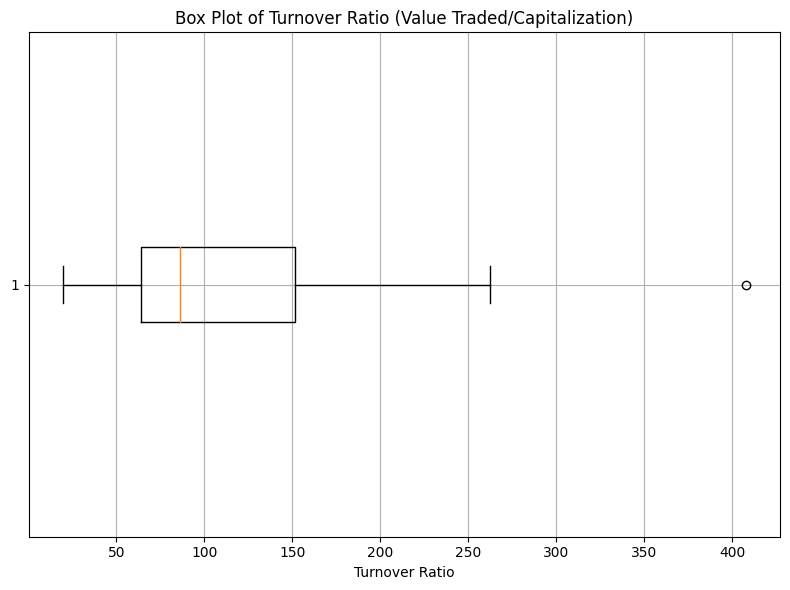

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['DDEM01USA156NWDB'], vert=False)
plt.title('Box Plot of Turnover Ratio (Value Traded/Capitalization)')
plt.xlabel('Turnover Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


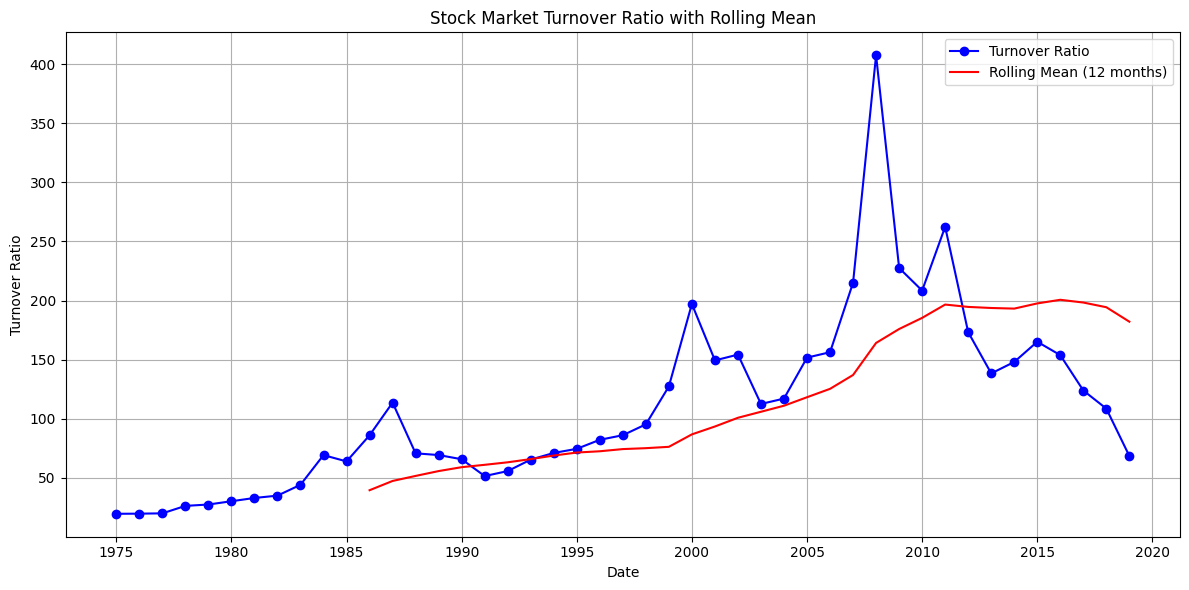

In [45]:
# Calculate rolling mean
rolling_mean = df['DDEM01USA156NWDB'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DDEM01USA156NWDB'], marker='o', linestyle='-', color='b', label='Turnover Ratio') # Use df.index instead of df['DATE']
plt.plot(df.index, rolling_mean, color='red', linestyle='-', label='Rolling Mean (12 months)') # Use df.index instead of df['DATE']
plt.title('Stock Market Turnover Ratio with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Turnover Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

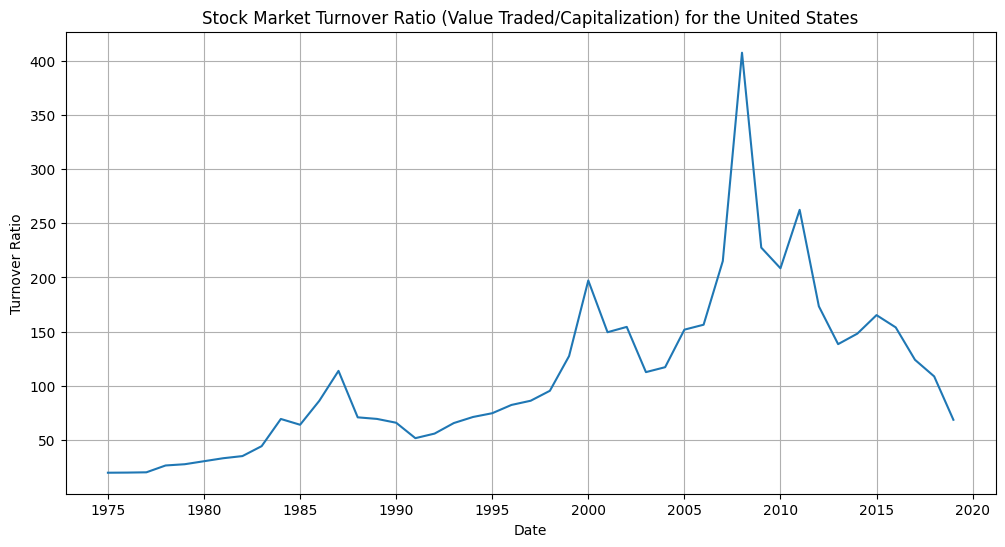

In [30]:
# Plot the turnover ratio over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE', y='DDEM01USA156NWDB')
plt.title('Stock Market Turnover Ratio (Value Traded/Capitalization) for the United States')
plt.xlabel('Date')
plt.ylabel('Turnover Ratio')
plt.grid(True)
plt.show()

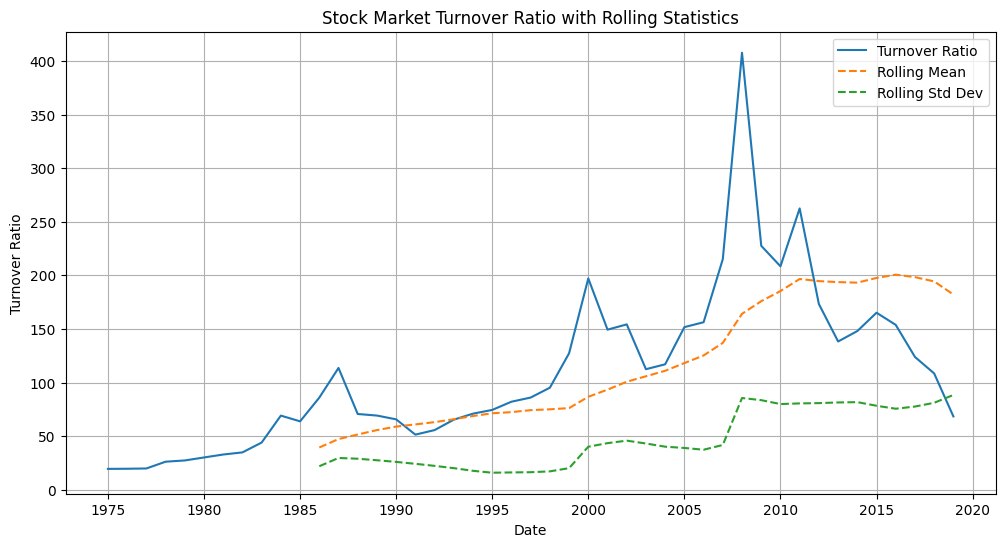

In [31]:
# Plot the rolling mean and standard deviation to observe trends and volatility
plt.figure(figsize=(12, 6))
rolling_mean = df['DDEM01USA156NWDB'].rolling(window=12).mean()
rolling_std = df['DDEM01USA156NWDB'].rolling(window=12).std()
plt.plot(df['DDEM01USA156NWDB'], label='Turnover Ratio')
plt.plot(rolling_mean, label='Rolling Mean', linestyle='--')
plt.plot(rolling_std, label='Rolling Std Dev', linestyle='--')
plt.title('Stock Market Turnover Ratio with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Turnover Ratio')
plt.legend()
plt.grid(True)
plt.show()


# **Model**

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [33]:
# Fit an ARIMA model
model = ARIMA(df['DDEM01USA156NWDB'], order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [34]:
# Make a prediction for the next 10 periods
forecast = model_fit.forecast(steps=10)

In [35]:
# Display the forecasted values
print(forecast)

2020-01-01    76.592746
2021-01-01    88.423931
2022-01-01    86.985417
2023-01-01    94.274156
2024-01-01    99.351284
2025-01-01    93.325402
2026-01-01    92.649721
2027-01-01    93.746339
2028-01-01    91.060499
2029-01-01    91.473556
Freq: AS-JAN, Name: predicted_mean, dtype: float64


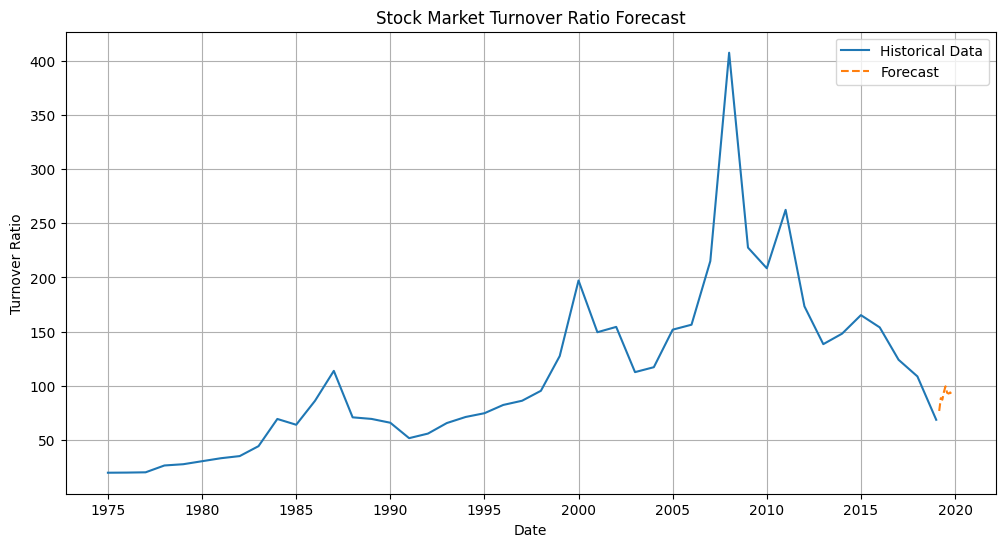

In [36]:
# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['DDEM01USA156NWDB'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', linestyle='--')
plt.title('Stock Market Turnover Ratio Forecast')
plt.xlabel('Date')
plt.ylabel('Turnover Ratio')
plt.legend()
plt.grid(True)
plt.show()